plot area, elevation and slope of planation surfaces in the eastern alps

In [15]:
import pandas as pd
import numpy as np
import math

# load data from csv files
# wagner et al, 2011, styrian karst of graz
df1 = pd.read_csv('zaraberg.csv', header=0)
df2 = pd.read_csv('hochstraden.csv', header=0)
df3 = pd.read_csv('trahutten.csv', header=0)

# rename columns with 10m_* to lidar*
df1.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)
df2.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)
df3.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)

# drop sheet_no and strat_id columns
df1.drop(columns=['sheet_no', 'strat_id'])
df2.drop(columns=['sheet_no', 'strat_id'])
df3.drop(columns=['sheet_no', 'strat_id'])

# convert area to km2 from m2
df1.area = (df1.area)/(1000000)
df2.area = (df2.area)/(1000000)
df3.area = (df3.area)/(1000000)

|column|          variable          |     handle name     |
|------|----------------------------|---------------------|
|  0   |         polygon id         |         id          |
|  1   |       area in km sq.       |        area         |
|  2   |       mean elev, srtm      |     srtm_mean       |
|  3   |    std. dev. elev, srtm    |     srtm_stdev      |
|  4   |       min. elev, srtm      |      srtm_min       |
|  5   |       max. elev, srtm      |      srtm_max       |
|  6   |    mean elev, 10m lidar    |     lidar_mean      |
|  7   | std. dev. elev, 10m lidar  |     lidar_stde      |
|  8   |    min. elev, 10m lidar    |     lidar_min       |
|  9   |    max. elev, 10m lidar    |     lidar_max       |
|  10  |    mean slope, 10m lidar   |     slope_mean      |
|  11  | std. dev. slope, 10m lidar |     slope_stde      |
|  12  |    min. slope, 10m lidar   |     slope_min       |
|  13  |    max. slope, 10m lidar   |     slope_max       |

In [17]:
df1.head(10) 
#df1 # uncomment to see full dataframe

,id,area,sheet_no,strat_id,srtm_mean,srtm_stdev,srtm_min,srtm_max,lidar_mean,lidar_stde,lidar_min,lidar_max,slope_mean,slope_stde,slope_min,slope_max
0,1,0.160966,164,19,559.192913,12.587887,539.0,584.0,557.975356,12.224593,536.141357,584.254211,9.427189,4.015104,0.207202,31.015356
1,2,0.044707,164,19,535.865672,11.899950,515.0,561.0,528.527750,8.239436,515.446960,547.140625,10.651769,4.880513,2.073944,26.873314
2,3,0.652459,164,19,437.399399,15.297636,407.0,475.0,433.552749,13.427152,406.270691,473.551147,8.892232,4.238228,0.198288,26.555300
3,4,0.032879,164,19,422.800000,4.779121,413.0,430.0,411.845962,5.457660,399.954041,423.308746,11.834969,3.797361,2.757638,23.120844
4,5,0.146220,164,19,429.395556,9.691186,405.0,449.0,419.434113,8.608701,401.317230,438.444336,9.983386,4.635541,0.376038,29.915018
5,6,0.038771,164,19,422.762712,2.546776,416.0,427.0,420.019310,2.396989,411.924652,424.208038,6.684118,3.095784,0.162213,14.056120
6,7,0.072989,164,19,434.261261,7.061776,419.0,447.0,430.314758,5.348369,415.355774,439.509857,7.759465,3.451838,0.305831,21.537197
7,8,0.119439,164,19,433.811828,11.472364,416.0,457.0,434.868773,11.692485,413.873840,458.949585,10.382273,2.679881,1.487993,17.284594
8,9,0.065002,164,19,432.782178,6.655012,419.0,444.0,429.037168,6.039680,415.225098,439.438446,9.704660,4.075454,0.281625,17.876154
9,10,0.134744,164,19,469.259804,8.892393,450.0,492.0,461.824500,6.884096,441.349060,477.085297,10.746207,5.220861,0.330049,29.137867


In [13]:
df1.drop(columns=['sheet_no', 'strat_id'])

,id,area,srtm_mean,srtm_stdev,srtm_min,srtm_max,lidar_mean,lidar_stde,lidar_min,lidar_max,slope_mean,slope_stde,slope_min,slope_max
0,1,0.160966,559.192913,12.587887,539.0,584.0,557.975356,12.224593,536.141357,584.254211,9.427189,4.015104,0.207202,31.015356
1,2,0.044707,535.865672,11.899950,515.0,561.0,528.527750,8.239436,515.446960,547.140625,10.651769,4.880513,2.073944,26.873314
2,3,0.652459,437.399399,15.297636,407.0,475.0,433.552749,13.427152,406.270691,473.551147,8.892232,4.238228,0.198288,26.555300
3,4,0.032879,422.800000,4.779121,413.0,430.0,411.845962,5.457660,399.954041,423.308746,11.834969,3.797361,2.757638,23.120844
4,5,0.146220,429.395556,9.691186,405.0,449.0,419.434113,8.608701,401.317230,438.444336,9.983386,4.635541,0.376038,29.915018
5,6,0.038771,422.762712,2.546776,416.0,427.0,420.019310,2.396989,411.924652,424.208038,6.684118,3.095784,0.162213,14.056120
6,7,0.072989,434.261261,7.061776,419.0,447.0,430.314758,5.348369,415.355774,439.509857,7.759465,3.451838,0.305831,21.537197
7,8,0.119439,433.811828,11.472364,416.0,457.0,434.868773,11.692485,413.873840,458.949585,10.382273,2.679881,1.487993,17.284594
8,9,0.065002,432.782178,6.655012,419.0,444.0,429.037168,6.039680,415.225098,439.438446,9.704660,4.075454,0.281625,17.876154
9,10,0.134744,469.259804,8.892393,450.0,492.0,461.824500,6.884096,441.349060,477.085297,10.746207,5.220861,0.330049,29.137867


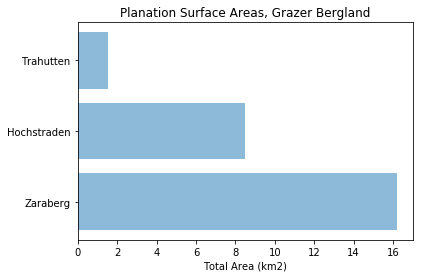

In [4]:
# plot bar chart of total area of each planation surface
%matplotlib inline 
from matplotlib import pyplot as plt

total_area = [np.sum(df1.area),np.sum(df2.area),np.sum(df3.area)]
surf_id = ('Zaraberg', 'Hochstraden', 'Trahutten')
y_pos = np.arange(len(surf_id))

#plan_bar = plt.figure(figsize = (10,6))
plt.barh(y_pos, total_area, align='center', alpha=0.5)
plt.yticks(y_pos, surf_id)
plt.xlabel('Total Area (km2)')
plt.title('Planation Surface Areas, Grazer Bergland')
plt.show()

Text(0.5, 1.0, '10m LiDAR')

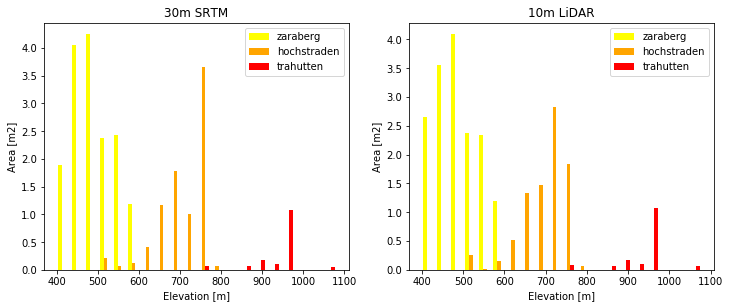

In [8]:
# plot histograms of planation surface elevation and slope in bins with area as frequency
# elevation
num_bins = 20

# compare srtm and lidar datasets
plt.figure(figsize=[12,10])
ax1 = plt.subplot(221)
n, bins, patches = ax1.hist([df1.srtm_mean,df2.srtm_mean,df3.srtm_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['zaraberg', 'hochstraden', 'trahutten'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='best')
plt.title('30m SRTM')


ax2 = plt.subplot(222)
n, bins, patches = ax2.hist([df1.lidar_mean,df2.lidar_mean,df3.lidar_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['zaraberg', 'hochstraden', 'trahutten'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='best')
plt.title('10m LiDAR')

Text(0.5, 1.0, 'Slope')

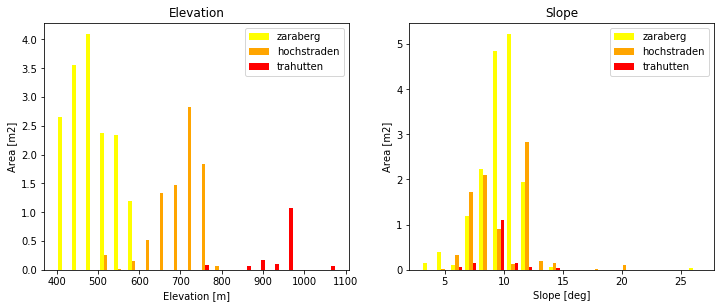

In [7]:
# elevation and slope distributions
plt.figure(figsize=[12,10])
ax1 = plt.subplot(221)
n, bins, patches = ax1.hist([df1.lidar_mean,df2.lidar_mean,df3.lidar_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['zaraberg', 'hochstraden', 'trahutten'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='best')
plt.title('Elevation')

ax2 = plt.subplot(222)
n, bins, patches = ax2.hist([df1.slope_mean,df2.slope_mean,df3.slope_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['zaraberg', 'hochstraden', 'trahutten'])
plt.xlabel('Slope [deg]')
plt.ylabel('Area [m2]')
plt.legend(loc='best')
plt.title('Slope')